분석환경 설정

In [24]:
import copy
import os
import sys
import pickle

from IPython.display import clear_output

__FILE_DIR_PATH = os.path.dirname(__vsc_ipynb_file__) \
    if __IPYTHON__ \
    else os.path.dirname(__file__)
    
WORKSPACE_HOME = __FILE_DIR_PATH.replace(
    f"/ipynb/{os.path.basename(__FILE_DIR_PATH)}", "")
WORKSPACE_HOME = WORKSPACE_HOME.replace("/trunk", "")
print(WORKSPACE_HOME)
sys.path.append(WORKSPACE_HOME)
DATASET_DIR_HOME = f"{WORKSPACE_HOME}/data/colley"
LOCAL_STORAGE_HOME_PATH = f"{WORKSPACE_HOME}"
SUB_STORAGE_HOME_PATH = "/data/tghwang"

import numpy as np
from pandas import DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from core import *
from ipirec import *
from colley import *

# plt.rcParams["font.family"] = "AppleGothic"
plt.rcParams["font.family"] = "NanumGothic"
mpl.rcParams["axes.unicode_minus"] = False

DATE_STR = DirectoryPathValidator.current_datetime_str().split("_")[0].strip()
"""YYYYMMDD"""
TIME_STR = DirectoryPathValidator.current_datetime_str().split("_")[1].strip()
"""HHMMSS"""
_FIG_DIR_HOME_PATH = f"{WORKSPACE_HOME}/trunk/obs/{DATE_STR}"
if not DirectoryPathValidator.exist_dir(_FIG_DIR_HOME_PATH):
    DirectoryPathValidator.mkdir(_FIG_DIR_HOME_PATH)

/Users/taegyu.hwang/git_repo/ipirec


관측할 변수들 구성

In [36]:
BIN_HOME_PATH = SUB_STORAGE_HOME_PATH
BIN_HOME_PATH = LOCAL_STORAGE_HOME_PATH

FOLD_SET_NO = 0
MODEL_NAME = "IPIRec_Rev4"
"""
220472
745701
771058
773697
774879: 81,94,95
나 (764602)
"""
user_id = 220472
TOP_N_ITEMS = 17

BIN_HOME_PATH = f"{BIN_HOME_PATH}/resources"
_BIN_REC_FILE_PATH = str.format(
    "{0}/{1}/{2}/{3}.bin",
    BIN_HOME_PATH,
    MODEL_NAME,
    ScoreBasedRecommender.__name__,
    FOLD_SET_NO,
)
if not os.path.exists(_BIN_REC_FILE_PATH):
    print(_BIN_REC_FILE_PATH)
    raise FileNotFoundError()

추천기로 모델재현

In [58]:
_recommender: ScoreBasedRecommender = None
with open(_BIN_REC_FILE_PATH, "rb") as fin:
    _recommender: ScoreBasedRecommender = pickle.load(fin)
    fin.close()
if _recommender == None:
    raise NotImplementedError()
_estimator: BaseCorrelationEstimator = _recommender._estimator
_model: CorrelationModel = _estimator.model
_model._dataset._data_root_path = DATASET_DIR_HOME
__TEST_SET = BaseAction.load_collection(
    _model._dataset.kfold_file_path(
        FOLD_SET_NO,
        DecisionType.E_PURCHASE,
        False,
        )
    )
# list(_model.user_dict.keys())

[IO] /Users/taegyu.hwang/git_repo/ipirec/data/colley/test_0_purchase_list.csv


[LOAD] test_0_purchase_list.csv: 100%|██████████| 469/469 [00:00<00:00, 85676.33it/s]


# TAGS SCORES

S

heatmap

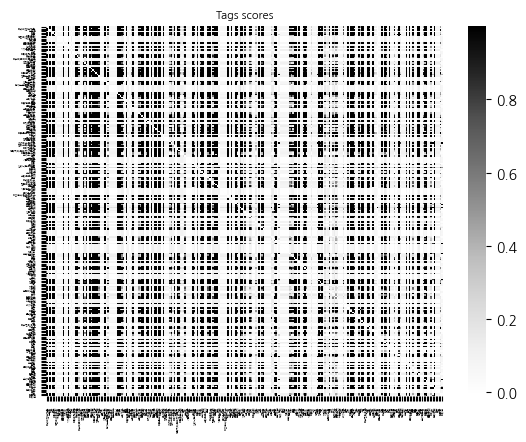

In [59]:
_tags_score: np.ndarray = copy.deepcopy(_estimator.arr_tags_score)
plt.title(label="Tags scores", fontsize=8.0)

_min = np.min(_tags_score)
_max = np.max(_tags_score[_tags_score < 1.0])
_tag_names_list = list(_estimator.tags_dict.keys())

plt.xlabel(xlabel="Source tags name", fontsize=4.0)
plt.ylabel(ylabel="Target tags name", fontsize=4.0)
plt.xticks(fontsize=2.0)
plt.yticks(fontsize=2.0)
ax = sns.heatmap(
    data=_tags_score,
    vmin=_min,
    vmax=_max,
    cmap="Grays",
    xticklabels=_tag_names_list,
    yticklabels=_tag_names_list,
)

_fig_file_path = str.format(
    "{0}/set{1}_S_hmap.svg",
    _FIG_DIR_HOME_PATH,
    FOLD_SET_NO,
)
__fig_dir_path = os.path.dirname(_fig_file_path)
if not os.path.exists(__fig_dir_path):
    DirectoryPathValidator.mkdir(__fig_dir_path)

ax.figure.savefig(_fig_file_path)
# plt.show()

clustermap

/Users/taegyu.hwang/anaconda3/envs/cfEnv/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/taegyu.hwang/anaconda3/envs/cfEnv/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


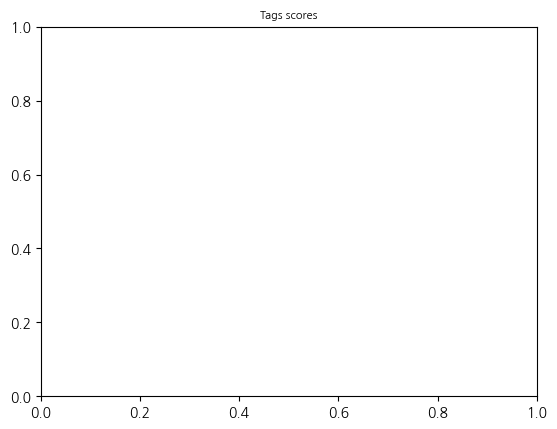

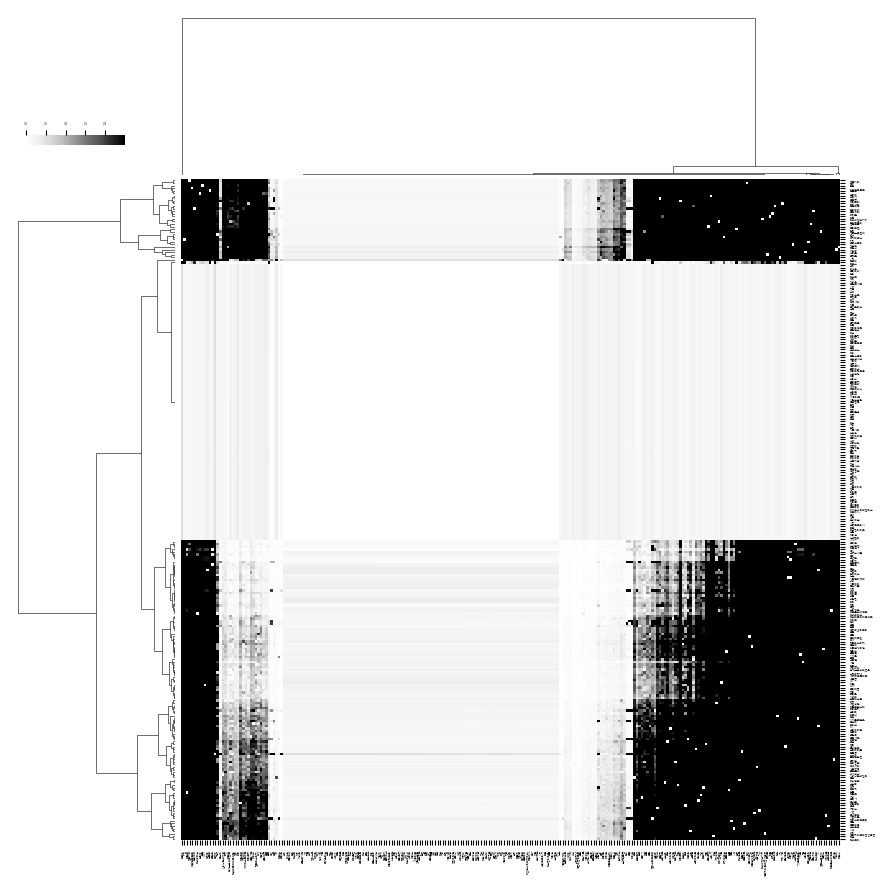

In [60]:
_tags_score: np.ndarray = copy.deepcopy(_estimator.arr_tags_score)
plt.title(label="Tags scores", fontsize=8.0)

_min = np.min(_tags_score)
_max = np.max(_tags_score[_tags_score < 1.0])
_tag_names_list = list(_estimator.tags_dict.keys())

tags_count = _estimator.tags_count
for _ in range(tags_count):
    _tags_score[_][_] = 0.0
ax = sns.clustermap(
    _tags_score,
    vmin=_min,
    vmax=_max,
    cmap="Grays",
    xticklabels=_tag_names_list,
    yticklabels=_tag_names_list,
    ## defaults
    # cbar_kws=dict(use_gridspec=False, location="top"),
    # cbar_pos=(0.02, 0.8, 0.05, 0.18),
    cbar_kws=dict(use_gridspec=False, location="top"),
    cbar_pos=(0.03, 0.85, 0.1, 0.01),
    ## (pos_x, pos_y, len_x, len_y)
)
ax.tick_params(axis="x", labelsize=2.0)
ax.tick_params(axis="y", labelsize=2.0)

_fig_file_path = str.format(
    "{0}/set{1}_S_cmap.svg",
    _FIG_DIR_HOME_PATH,
    FOLD_SET_NO,
)
__fig_dir_path = os.path.dirname(_fig_file_path)
if not os.path.exists(__fig_dir_path):
    DirectoryPathValidator.mkdir(__fig_dir_path)

ax.figure.savefig(_fig_file_path)
# plt.show()

W

heatmap

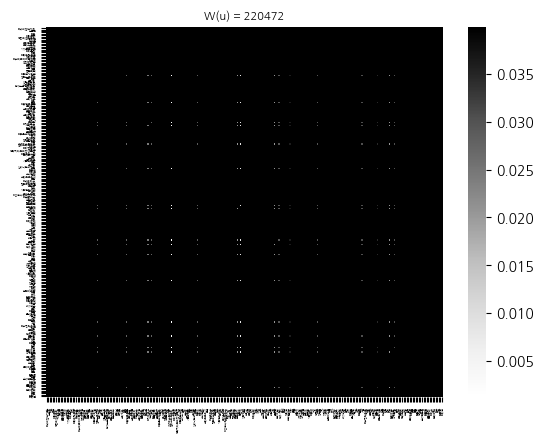

In [61]:
## HIER_HEATMAP
_users_dist: np.ndarray = copy.deepcopy(_estimator.arr_user_idx_to_weights)
plt.title(label=f"W(u) = {user_id}", fontsize=8.0)

uidx = _estimator.user_id_to_idx[user_id]
if _estimator.user_id_to_idx.get(user_id, -1) == -1:
    raise KeyError()

__OBS_W: np.ndarray = _users_dist[uidx]
_min = np.min(__OBS_W)
_max = np.max(__OBS_W[__OBS_W < 1.0])
_tag_names_list = list(_estimator.tags_dict.keys())

plt.xlabel(xlabel="Source tags name", fontsize=4.0)
plt.ylabel(ylabel="Target tags name", fontsize=4.0)
plt.xticks(fontsize=2.0)
plt.yticks(fontsize=2.0)
ax = sns.heatmap(
    data=__OBS_W,
    vmin=_min,
    vmax=_max,
    cmap="Grays",
    xticklabels=_tag_names_list,
    yticklabels=_tag_names_list,
)

_fig_file_path = str.format(
    "{0}/set{1}_W_u{2}_hmap.svg",
    _FIG_DIR_HOME_PATH,
    FOLD_SET_NO,
    user_id,
)
__fig_dir_path = os.path.dirname(_fig_file_path)
if not os.path.exists(__fig_dir_path):
    DirectoryPathValidator.mkdir(__fig_dir_path)

ax.figure.savefig(_fig_file_path)
# plt.show()

clustermap

/Users/taegyu.hwang/anaconda3/envs/cfEnv/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/taegyu.hwang/anaconda3/envs/cfEnv/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


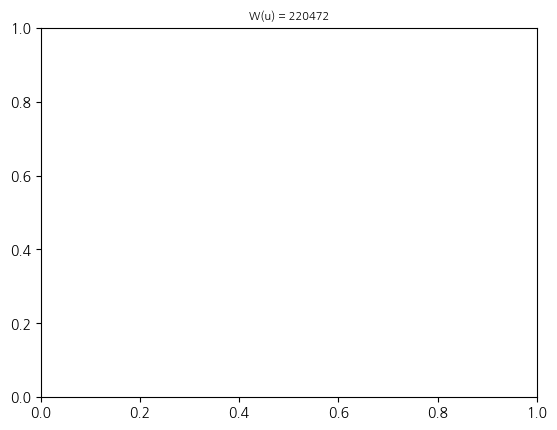

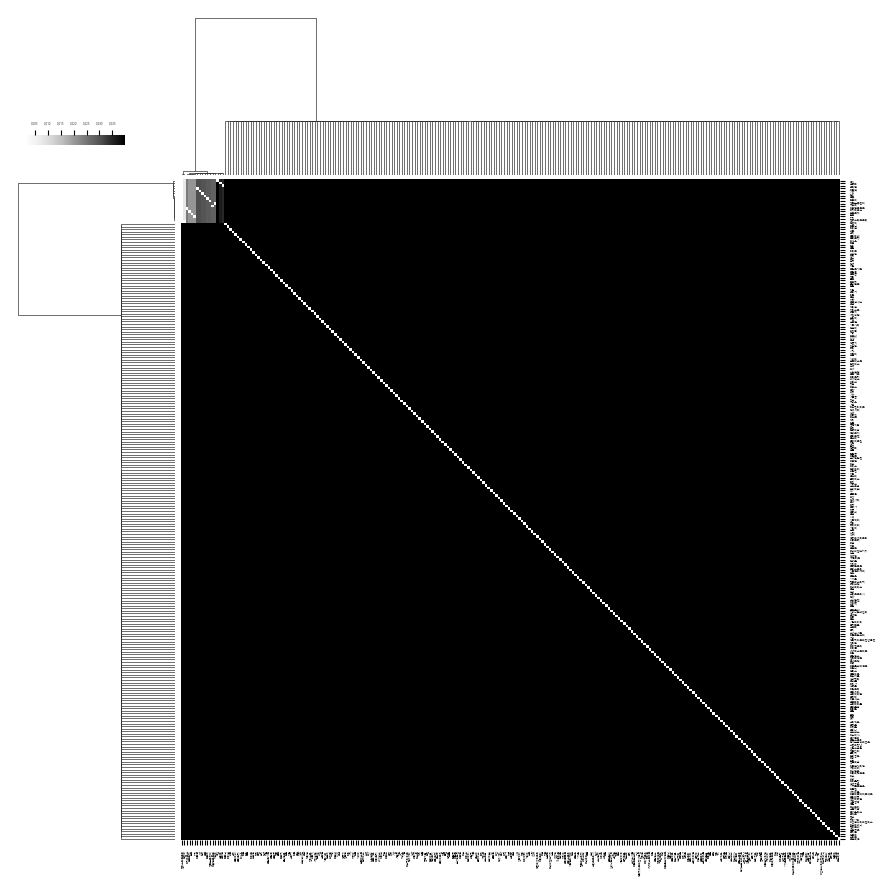

In [62]:
## HIER_HEATMAP
_users_dist: np.ndarray = copy.deepcopy(_estimator.arr_user_idx_to_weights)
plt.title(label=f"W(u) = {user_id}", fontsize=8.0)

uidx = _estimator.user_id_to_idx[user_id]
if _estimator.user_id_to_idx.get(user_id, -1) == -1:
    raise KeyError()

__OBS_W: np.ndarray = _users_dist[uidx]
_min = np.min(__OBS_W)
_max = np.max(__OBS_W[__OBS_W < 1.0])
_tag_names_list = list(_estimator.tags_dict.keys())

tags_count = _estimator.tags_count
for _ in range(tags_count):
    __OBS_W[_][_] = 0.0
ax = sns.clustermap(
    __OBS_W,
    vmin=_min,
    vmax=_max,
    cmap="Grays",
    xticklabels=_tag_names_list,
    yticklabels=_tag_names_list,
    ## defaults
    # cbar_kws=dict(use_gridspec=False, location="top"),
    # cbar_pos=(0.02, 0.8, 0.05, 0.18),
    cbar_kws=dict(use_gridspec=False, location="top"),
    cbar_pos=(0.03, 0.85, 0.1, 0.01),
    ## (pos_x, pos_y, len_x, len_y)
)
ax.tick_params(axis="x", labelsize=2.0)
ax.tick_params(axis="y", labelsize=2.0)

_fig_file_path = str.format(
    "{0}/set{1}_W_u{2}_cmap.svg",
    _FIG_DIR_HOME_PATH,
    FOLD_SET_NO,
    user_id,
)
__fig_dir_path = os.path.dirname(_fig_file_path)
if not os.path.exists(__fig_dir_path):
    DirectoryPathValidator.mkdir(__fig_dir_path)

ax.figure.savefig(_fig_file_path)
# plt.show()

W(u) * S

heatmap

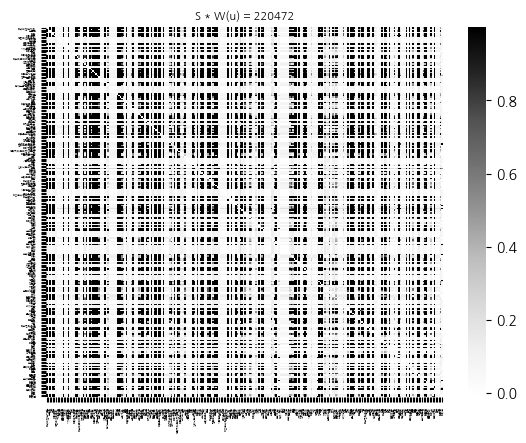

In [63]:
## HEATMAP
_tags_score: np.ndarray = copy.deepcopy(_estimator.arr_tags_score)
_tag_names_list = list(_estimator.tags_dict.keys())

tags_count = _estimator.tags_count
plt.title(label=f"S * W(u) = {user_id}", fontsize=8.0)

uidx = _estimator.user_id_to_idx[user_id]
if _estimator.user_id_to_idx.get(user_id, -1) == -1:
    raise KeyError()

_users_dist: np.ndarray = copy.deepcopy(_estimator.arr_user_idx_to_weights)
__OBS_W: np.ndarray = _users_dist[uidx]

for _ in range(tags_count):
    _tags_score[_][_] = 0.0
    __OBS_W[_][_] = 0.0

_WS = _tags_score * __OBS_W
_min = np.min(_WS)
_max = np.max(_WS[_WS < 1.0])

plt.xlabel(xlabel="Source tags name", fontsize=4.0)
plt.ylabel(ylabel="Target tags name", fontsize=4.0)
plt.xticks(fontsize=2.0)
plt.yticks(fontsize=2.0)
ax = sns.heatmap(
    data=_WS,
    vmin=_min,
    vmax=_max,
    cmap="Grays",
    xticklabels=_tag_names_list,
    yticklabels=_tag_names_list,
)
ax.tick_params(axis="x", labelsize=2.0)
ax.tick_params(axis="y", labelsize=2.0)

_fig_file_path = str.format(
    "{0}/set{1}_WS_u{2}_hmap.svg",
    _FIG_DIR_HOME_PATH,
    FOLD_SET_NO,
    user_id,
)
__fig_dir_path = os.path.dirname(_fig_file_path)
if not os.path.exists(__fig_dir_path):
    DirectoryPathValidator.mkdir(__fig_dir_path)

ax.figure.savefig(_fig_file_path)
# plt.show()

clustermap

/Users/taegyu.hwang/anaconda3/envs/cfEnv/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Users/taegyu.hwang/anaconda3/envs/cfEnv/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


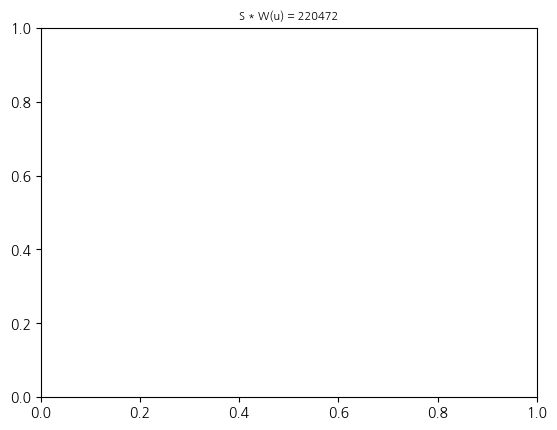

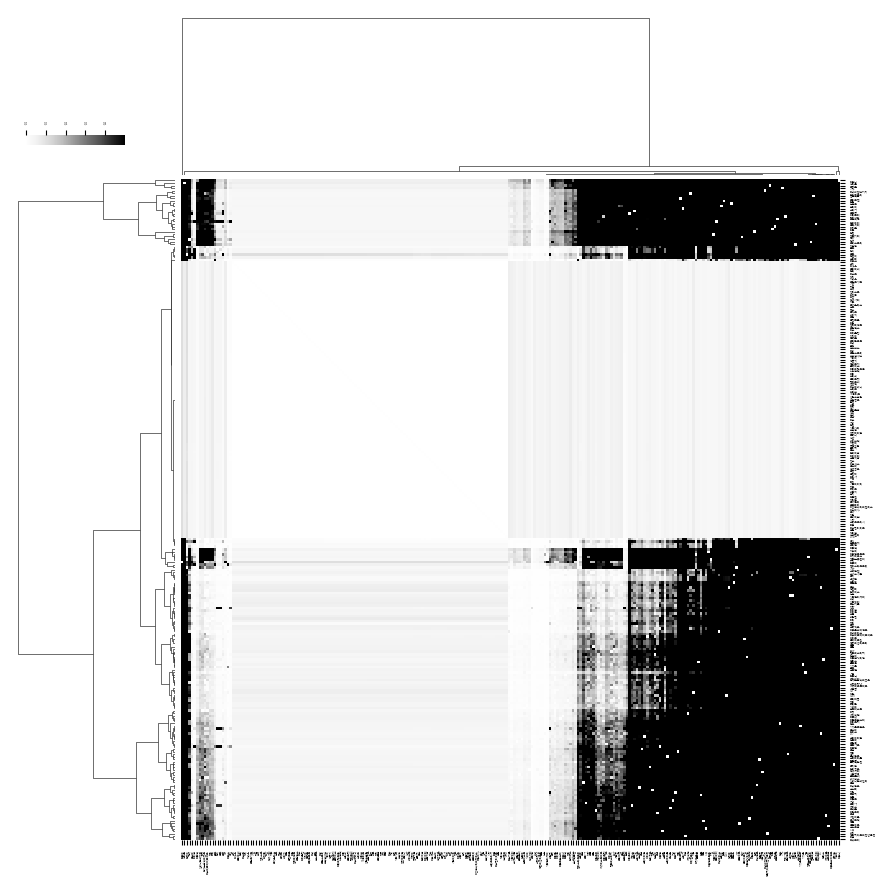

In [64]:
## HIER_HEATMAP
_tags_score: np.ndarray = copy.deepcopy(_estimator.arr_tags_score)
_tag_names_list = list(_estimator.tags_dict.keys())

tags_count = _estimator.tags_count
plt.title(label=f"S * W(u) = {user_id}", fontsize=8.0)

uidx = _estimator.user_id_to_idx[user_id]
if _estimator.user_id_to_idx.get(user_id, -1) == -1:
    raise KeyError()

_users_dist: np.ndarray = copy.deepcopy(_estimator.arr_user_idx_to_weights)
__OBS_W: np.ndarray = _users_dist[uidx]

for _ in range(tags_count):
    _tags_score[_][_] = 0.0
    __OBS_W[_][_] = 0.0

_WS = _tags_score * __OBS_W
_min = np.min(_WS)
_max = np.max(_WS[_WS < 1.0])
ax = sns.clustermap(
    _WS,
    vmin=_min,
    vmax=_max,
    cmap="Grays",
    xticklabels=_tag_names_list,
    yticklabels=_tag_names_list,
    ## defaults
    # cbar_kws=dict(use_gridspec=False, location="top"),
    # cbar_pos=(0.02, 0.8, 0.05, 0.18),
    cbar_kws=dict(use_gridspec=False, location="top"),
    cbar_pos=(0.03, 0.85, 0.1, 0.01),
    ## (pos_x, pos_y, len_x, len_y)
)
ax.tick_params(axis="x", labelsize=2.0)
ax.tick_params(axis="y", labelsize=2.0)

_fig_file_path = str.format(
    "{0}/set{1}_WS_u{2}_cmap.svg",
    _FIG_DIR_HOME_PATH,
    FOLD_SET_NO,
    user_id,
)
__fig_dir_path = os.path.dirname(_fig_file_path)
if not os.path.exists(__fig_dir_path):
    DirectoryPathValidator.mkdir(__fig_dir_path)

ax.figure.savefig(_fig_file_path)
# plt.show()

Positive decisions

In [65]:
for inst in [_ for _ in __TEST_SET if _.user_id == user_id]:
    inst: BaseAction
    if not inst.item_id in _recommender.item_dict:
        continue
    item: ItemEntity = _recommender.item_dict[inst.item_id]
    print(f"{item.item_id}, {item.item_name}, {item.tags_set}")

91, 짱구는못말려 대형 짱구피규어, {'짱구는못말려', '피규어'}
94, 빤쮸토끼 스마트 베드 테이블 2종, {'빤쮸토끼', '인테리어', '테이블'}
92, 곽철이 뭉뚝 머그&소서 세트, {'인테리어', '슬리퍼', '그릇', '접시', '머그컵', '곽철이'}


Recommended items

In [66]:
user: UserEntity = _estimator.user_dict[user_id]
user.estimated_items_score_list
_orded_items = sorted(
    user.estimated_items_score_list,
    key=lambda x:x.estimated_score,
    reverse=True,
    )[:TOP_N_ITEMS]

print("interest_tags: ")
print(user.set_of_interest_tags)
print("decisioned tags:")
print(user.dict_of_interaction_tags["all"])
print()
print("recommended items:")
_ = 0
for inst in _orded_items:
    inst: BaseAction
    item: ItemEntity = _estimator.item_dict[inst.item_id]
    _ += 1
    print(f"[{_}/{TOP_N_ITEMS}] {inst.item_id}: {inst.estimated_score}, {item.item_name}")
# end : for (top_n_items)

interest_tags: 
{'미니언즈', '장난감', '짱구는못말려'}
decisioned tags:
{'에코백', '빤쮸토끼', '짱구는못말려', '슬리퍼', '가방', '유리컵', '키링', '월레스와그로밋', '욕실', '그릇', '접시', '피규어', '완구', '이웃집토토로', '미키마우스', '지브리', '곽철이'}

recommended items:
[1/17] 6: 1.0, 월레스와 그로밋 마켓백 4종
[2/17] 20: 1.0, 원피스 쵸파 구름 블루투스 스피커
[3/17] 33: 1.0, 월레스와 그로밋 크리스마스 엽서 세트(10p 1set)
[4/17] 34: 1.0, 월레스와 그로밋 크리스마스 엽서(1p)
[5/17] 41: 1.0, 해리포터 벌스데이 파우치
[6/17] 50: 1.0, 해리포터 폴리주스 포션 무드등 S
[7/17] 61: 1.0, 곽철이 시리얼볼 1P
[8/17] 80: 1.0, 월레스와 그로밋 머그컵 - 모자 그로밋
[9/17] 82: 1.0, 곽철이 물티슈 케이스
[10/17] 83: 1.0, 빤쮸토끼 미니 빔 카메라 키링 - 아이스크림
[11/17] 91: 1.0, 짱구는못말려 대형 짱구피규어
[12/17] 92: 1.0, 곽철이 뭉뚝 머그&소서 세트
[13/17] 94: 1.0, 빤쮸토끼 스마트 베드 테이블 2종
[14/17] 96: 1.0, 곽철이 겨울 털슬리퍼 2종
[15/17] 97: 1.0, 곽철이 크리스마스 패브릭 포스터
[16/17] 101: 1.0, 월레스와 그로밋 애프터눈 티 접시 3P 세트
[17/17] 529: 1.0, 케어베어 무드등 - 핑크


In [67]:
item: ItemEntity = _estimator.item_dict[81]
print(item.item_name)
print(item.tags_set)

월레스와 그로밋 숀 발매트
{'월레스와그로밋', '욕실'}
